###  Importing Required Necessary Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import correlate2d
from scipy.ndimage import gaussian_filter


### Load and preprocess the image

In [4]:
img = cv2.imread('image_1.jpg')
img = cv2.resize(img, (256, 256))


### Task 1: Display data type

In [6]:
print("Task 1: Data Type of Image")
print(f"Data type of image: {img.dtype}\n")

Task 1: Data Type of Image
Data type of image: uint8



### Task 2: Display histograms of RGB channels

Task 2: RGB Channel Histograms


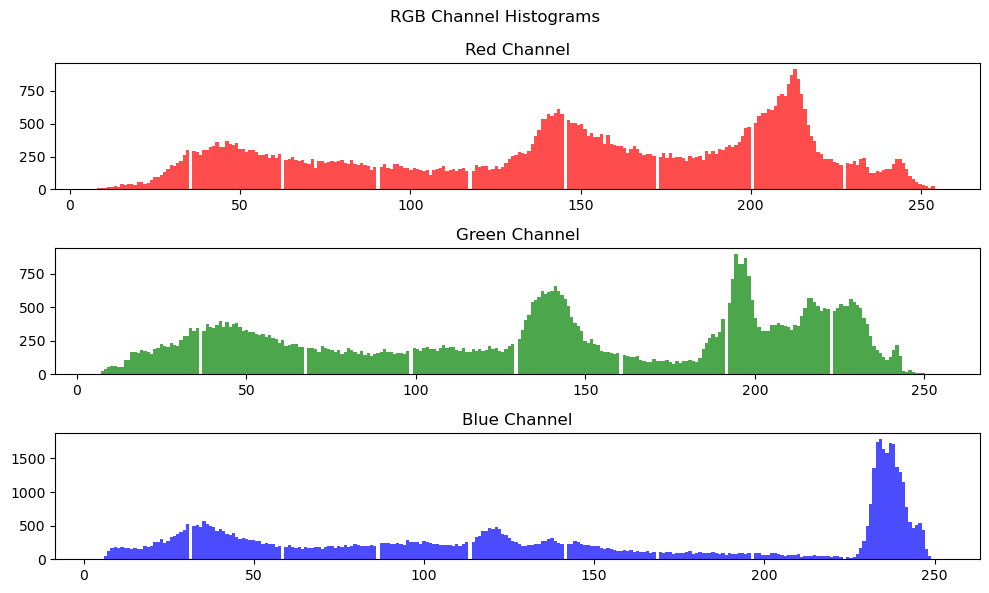

<Figure size 640x480 with 0 Axes>

In [10]:
print("Task 2: RGB Channel Histograms")
plt.figure(figsize=(10, 6))
plt.suptitle('RGB Channel Histograms')
plt.subplot(3, 1, 1)
plt.hist(img[:, :, 2].ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel')
plt.subplot(3, 1, 2)
plt.hist(img[:, :, 1].ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel')
plt.subplot(3, 1, 3)
plt.hist(img[:, :, 0].ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel')
plt.tight_layout()
plt.show()
plt.savefig('img')

### Task 3: Convert to grayscale

Task 3: Grayscale Conversion


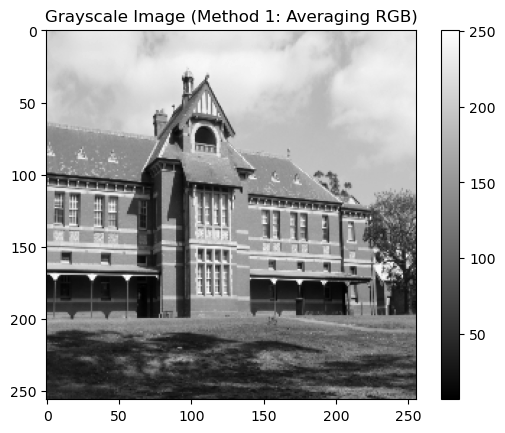

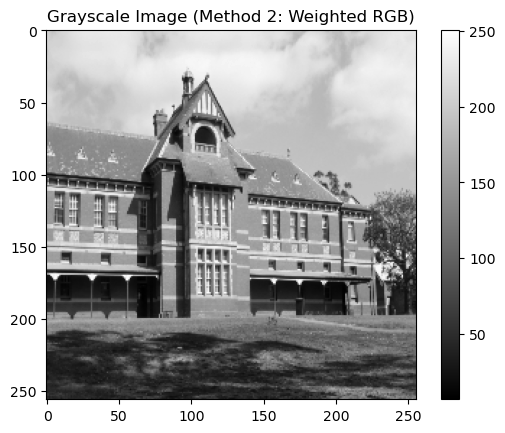

Both methods produce approximately the same grayscale image.



In [36]:
print("Task 3: Grayscale Conversion")
gray_img1 = np.mean(img, axis=2)
plt.figure()
plt.imshow(gray_img1, cmap='gray')
plt.title('Grayscale Image (Method 1: Averaging RGB)')
plt.colorbar()
plt.show()

gray_img2 = (img[:, :, 0] / 3 + img[:, :, 1] / 3 + img[:, :, 2] / 3)
plt.figure()
plt.imshow(gray_img2, cmap='gray')
plt.title('Grayscale Image (Method 2: Weighted RGB)')
plt.colorbar()
plt.show()

if np.allclose(gray_img1, gray_img2):
    print("Both methods produce approximately the same grayscale image.\n")
else:
    print("The methods produce slightly different grayscale images.\n")


### Task 4: Histogram of grayscale image

Task 4: Grayscale Histogram and Range


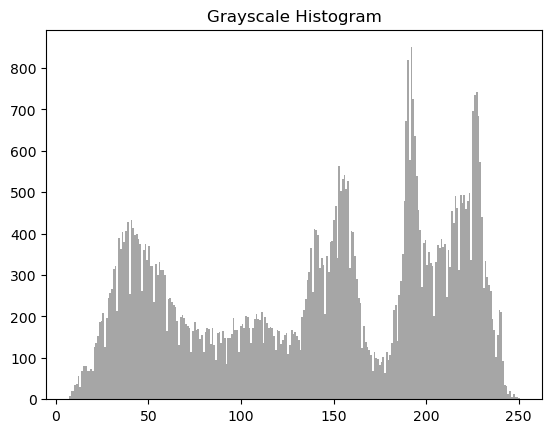

Grayscale Min: 7.0, Max: 250.66666666666666



In [39]:
print("Task 4: Grayscale Histogram and Range")
plt.figure()
plt.hist(gray_img1.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Grayscale Histogram')
plt.show()
min_val, max_val = gray_img1.min(), gray_img1.max()
print(f"Grayscale Min: {min_val}, Max: {max_val}\n")

### Task 5: Generate Gaussian white noise

Task 5: Gaussian White Noise Generation


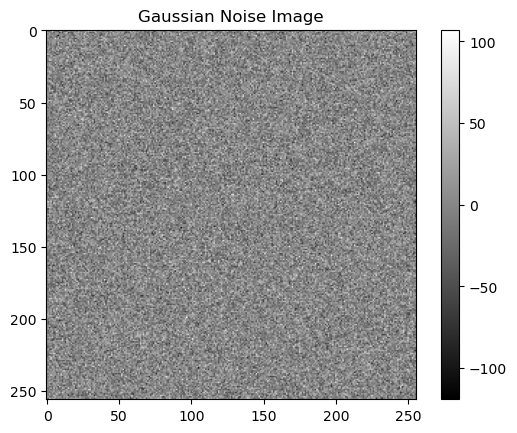

In [42]:
print("Task 5: Gaussian White Noise Generation")
noise = 25 * np.random.randn(*gray_img1.shape)
plt.figure()
plt.imshow(noise, cmap='gray')
plt.title('Gaussian Noise Image')
plt.colorbar()
plt.show()

### Task 6: Histogram and stats of noise

Task 6: Noise Histogram and Statistics


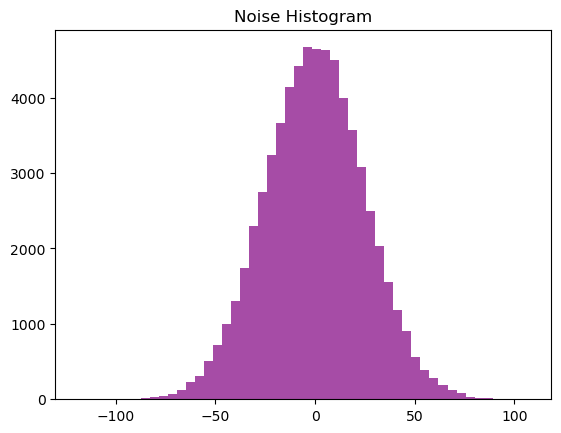

Noise Mean: -0.08100259386088854, Noise Std: 25.03080285774862



In [45]:
print("Task 6: Noise Histogram and Statistics")
plt.figure()
plt.hist(noise.ravel(), bins=50, color='purple', alpha=0.7)
plt.title('Noise Histogram')
plt.show()
mean_noise = np.mean(noise)
std_noise = np.std(noise)
print(f"Noise Mean: {mean_noise}, Noise Std: {std_noise}\n")

### Task 7: Autocorrelation

Task 7: Autocorrelation of Noise


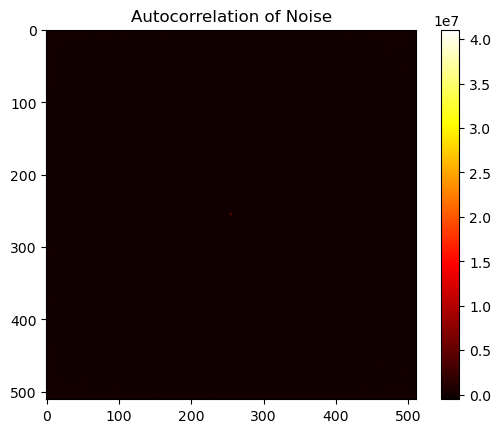

In [50]:
print("Task 7: Autocorrelation of Noise")
auto_corr = correlate2d(noise, noise, mode='full')
plt.figure()
plt.imshow(auto_corr, cmap='hot')
plt.title('Autocorrelation of Noise')
plt.colorbar()
plt.show()

### Task 8: Adding noise to grayscale image

Task 8: Noisy Image


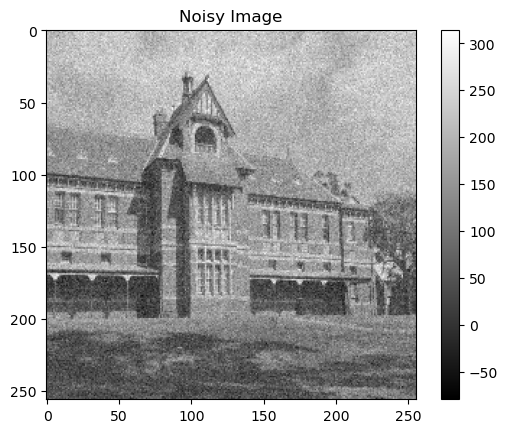

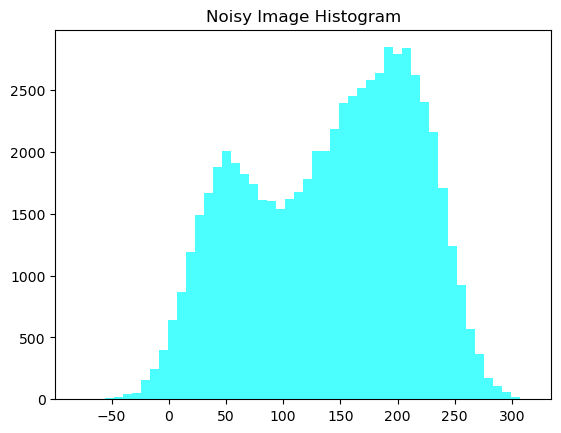

In [53]:
print("Task 8: Noisy Image")
noisy_img = gray_img1 + noise
plt.figure()
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.colorbar()
plt.show()
plt.figure()
plt.hist(noisy_img.ravel(), bins=50, color='cyan', alpha=0.7)
plt.title('Noisy Image Histogram')
plt.show()

###  Task 9: Compute SNR and PSNR

In [56]:
print("Task 9: Compute SNR and PSNR")
snr_value = (max_val - min_val) / std_noise
psnr_value = 20 * np.log10(snr_value)
print(f"SNR: {snr_value}, PSNR: {psnr_value} dB\n")


Task 9: Compute SNR and PSNR
SNR: 9.734672437453854, PSNR: 19.76642685004412 dB



### Task 10: Apply 2D smoothing filter

Task 10: Apply 2D Smoothing Filter


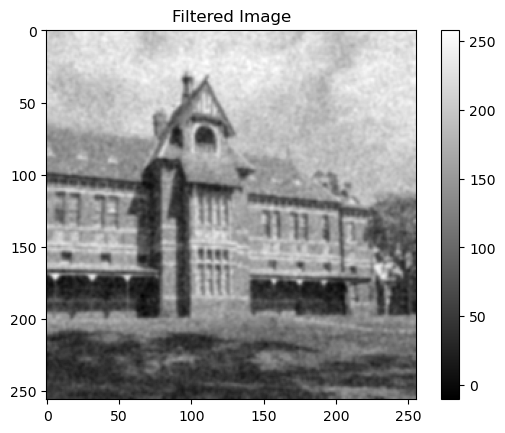

Filtered SNR: 3.7712335382638487



In [59]:
print("Task 10: Apply 2D Smoothing Filter")
filtered_img = gaussian_filter(noisy_img, sigma=1)
plt.figure()
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')
plt.colorbar()
plt.show()
filtered_snr = (max_val - min_val) / np.std(filtered_img)
print(f"Filtered SNR: {filtered_snr}\n")

###  Task 11: Study evolution of SNR with filter size

Task 11: SNR Evolution with Filter Size


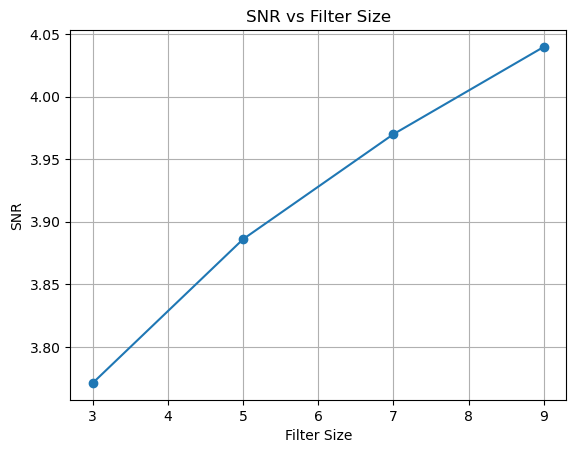

Filter Size: 3, SNR: 3.7712335382638487
Filter Size: 5, SNR: 3.886079902287835
Filter Size: 7, SNR: 3.9699253844947524
Filter Size: 9, SNR: 4.039622199613196


In [62]:
print("Task 11: SNR Evolution with Filter Size")
filter_sizes = [3, 5, 7, 9]
snr_results = []
for size in filter_sizes:
    filtered_img = gaussian_filter(noisy_img, sigma=size/3)
    snr_results.append((max_val - min_val) / np.std(filtered_img))

plt.figure()
plt.plot(filter_sizes, snr_results, '-o')
plt.title('SNR vs Filter Size')
plt.xlabel('Filter Size')
plt.ylabel('SNR')
plt.grid()
plt.show()

for size, snr in zip(filter_sizes, snr_results):
    print(f"Filter Size: {size}, SNR: {snr}")